회귀

선형회귀

In [2]:
import os
print(os.getcwd()) # 현재 작업 디렉토리 확인
print(os.listdir()) # 현재 디렉토리의 파일 목록 확인

/Users/jojungon/AI_Project/regression
['regression_study.ipynb']


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

# 재현성을 위해 random seed 설정
random.seed(42)
np.random.seed(42)

# 데이터 준비
X = np.array([[1], [2], [3], [4], [5]]) # 독립변수
y = np.array([2, 4, 5, 4, 5]) # 종속변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
predictions = model.predict(X_test)

# 결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])
print("\n모델 계수:")
print("기울기 (slope):", model.coef_[0])
print("절편 (intercept):", model.intercept_)
print("\n테스트 세트 실제 값:", y_test)
print("테스트 세트 예측 값:", predictions)
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, predictions))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, predictions))

학습 데이터 크기: 4
테스트 데이터 크기: 1

모델 계수:
기울기 (slope): 0.6857142857142857
절편 (intercept): 1.7714285714285714

테스트 세트 실제 값: [4]
테스트 세트 예측 값: [3.14285714]

모델 성능:
R² 점수: nan
평균 제곱 오차 (MSE): 0.7346938775510206


/Users/jojungon/AI_Project/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


데이터셋 크기: (768, 9)

처음 5개 행:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0 33.60   
1            1       85             66             29        0 26.60   
2            8      183             64              0        0 23.30   
3            1       89             66             23       94 28.10   
4            0      137             40             35      168 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1  

기술통계:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         768.00   768.00 768.00   
mean          3.85   120.89          69.11          20.54    79.80  31.99   
std           3.37    31.97          

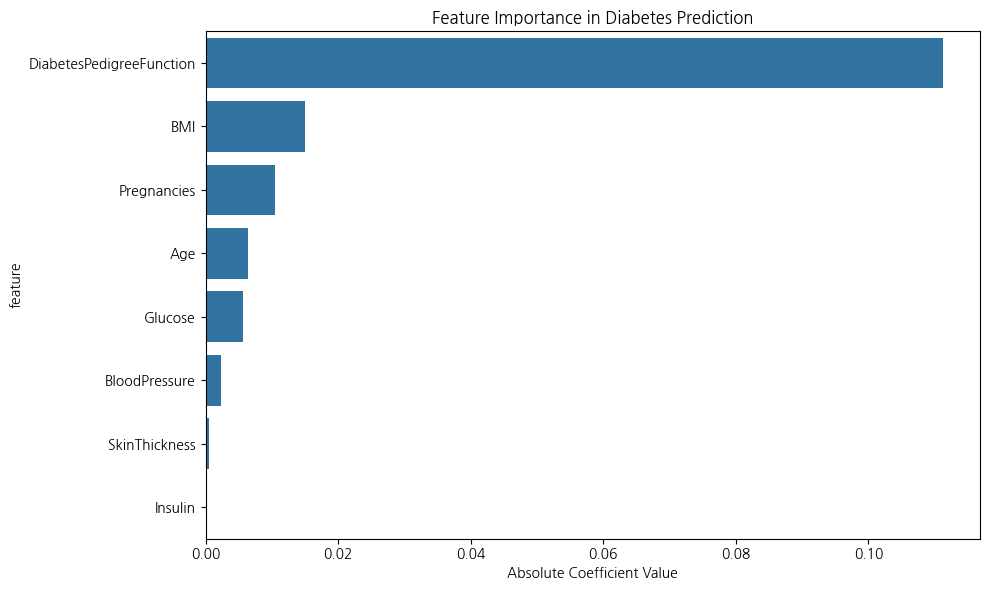

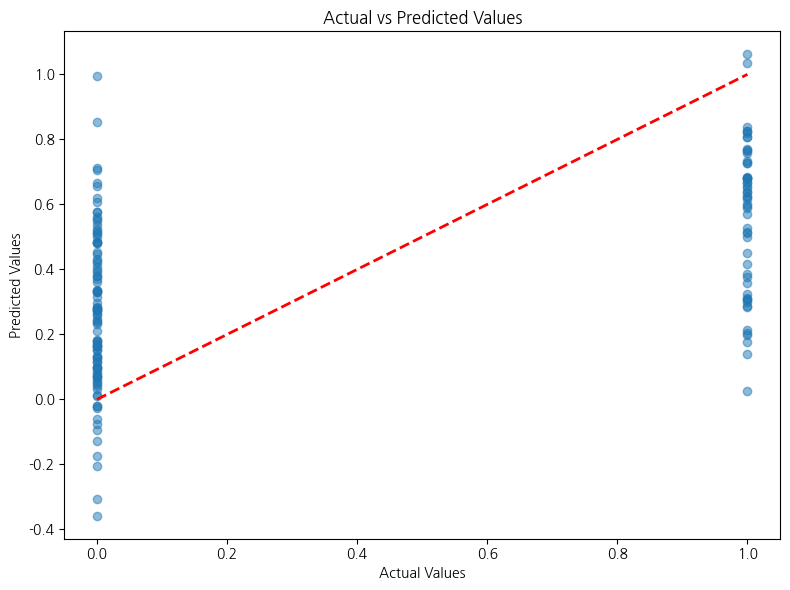

In [4]:
# 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 출력 범위 조정
pd.set_option("display.max_columns", None) # 모든 열을 출력
pd.set_option("display.max_rows", None) # 모든 행을 출력

# 데이터 로드
df = pd.read_csv("../dataset/diabetes.csv")

# 데이터 확인
print("데이터셋 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print("\n기술통계:")
print(df.describe())

# 독립변수(X)와 종속변수(y) 분리
X = df.drop("Outcome", axis=1) # Outcome을 제외한 모든 특성
y = df["Outcome"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))

# 특성 중요도 분석
feature_importance = pd.DataFrame({
  "feature": X.columns,
  "importance": np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values("importance", ascending=False)

print("\n특성 중요도:")
print(feature_importance)

# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance)
plt.title("Feature Importance in Diabetes Prediction")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.show()

다중선형회귀

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 접수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4]) # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1]) # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75]) # 시험 점수

# 입력 데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))
y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6, 2]]) # 공부 6시간, 과외 2시간
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")

# 모델 성능 평가(R-squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수: 86.5
R-squared: 0.9613


/Users/jojungon/AI_Project/.venv/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/jojungon/.matplotlib
['Nanum Gothic']
10.0
회귀 계수
X1: 1.7882
X2: 2.9284
X3: 1.5135

절편: 0.1535

R-squared 값: 0.9566

평균제곱근오차(RMSE): 0.7174


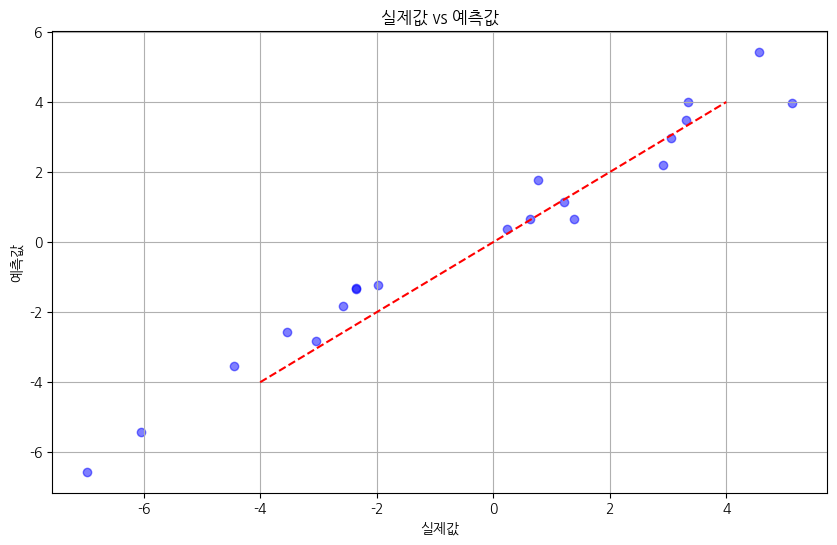


새로운 데이터 예측값: 3.2192


/Users/jojungon/AI_Project/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 설정 위치
print(mpl.matplotlib_fname()) # 폰트 적용을 위해 해당 파일이 존재하는 폴더의 font 폴더에 사용하고자 하는 ttf 폰트 파일을 추가해야한다.
print(mpl.get_cachedir()) # 파일 추가 후 기존 캐시 삭제 후 vscode를 저장 후 재실행 하여 캐시를 새로 생성

# 현재 사용중인 폰트와 사이즈 확인 코드
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])

# 폰트 지정
mpl.rcParams['font.family'] = 'Nanum Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams["axes.unicode_minus"] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = "{:.2f}".format

# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100

# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

# 종속변수 생성(Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)

# 데이터프레임 생성
data = pd.DataFrame({
    "X1" : X1, 
    "X2" : X2,
    "X3" : X3,
    "Y" : Y
})

# 학습용과 테스트용 데이터 분리
X = data[["X1", "X2", "X3"]]
y = data["Y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"\n평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([-4, 4], [-4, 4], "r--") # 대각선
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값 vs 예측값")
plt.grid(True)
plt.show()

# 새로운 데이터로 예측 예시
new_data = np.array([[0.5, 1.0, -0.5]])
prediction = model.predict(new_data)
print(f"\n새로운 데이터 예측값: {prediction[0]:.4f}")


선형회귀 추가학습

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv("../dataset/LinearRegressionData.csv")

In [16]:
dataset.head()

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22


In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [20]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

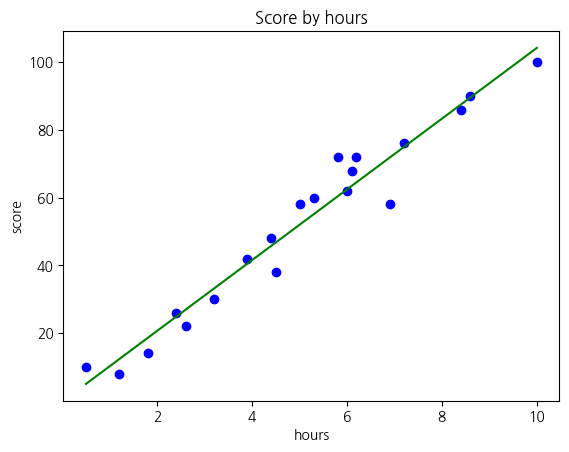

In [21]:
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="green")
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [22]:
print("9 시간 공부 시 예상 점수:", reg.predict([[9]]))

9 시간 공부 시 예상 점수: [93.77478776]


In [23]:
reg.coef_ # 기울기(m)

array([10.44369694])

In [24]:
reg.intercept_ # y절편(b)

-0.218484702867201

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
dataset = pd.read_csv("../dataset/LinearRegressionData.csv")
dataset

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22
5,3.20,30
6,3.90,42
7,4.40,48
8,4.50,38
9,5.00,58


In [28]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [31]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [32]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [33]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [34]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [35]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [37]:
reg.fit(X_train, y_train)

LinearRegression()

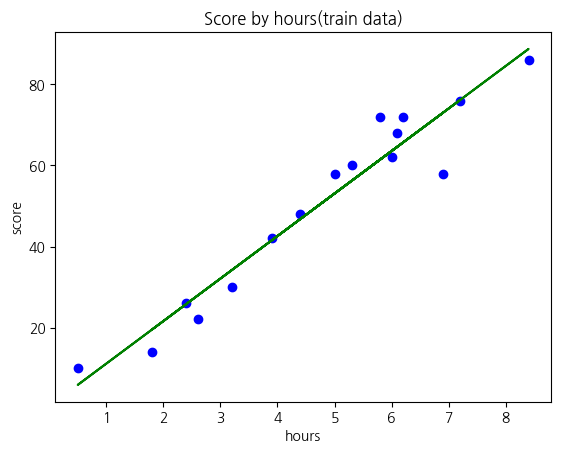

In [41]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, reg.predict(X_train), color="green")
plt.title("Score by hours(train data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

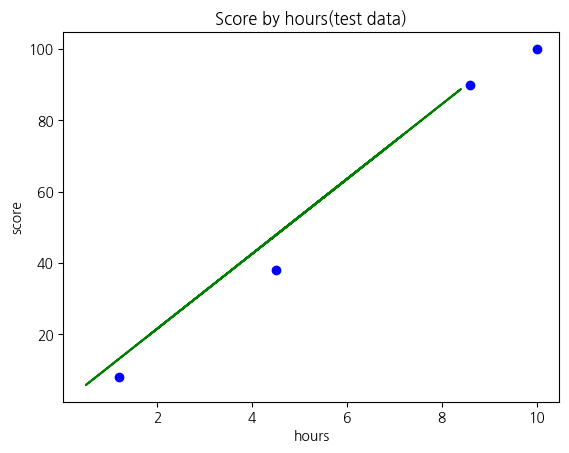

In [42]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_train, reg.predict(X_train), color="green")
plt.title("Score by hours(test data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

경사하강법 예제

In [44]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1) # max_iter : 모델 학습 횟수, eat0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

/Users/jojungon/AI_Project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

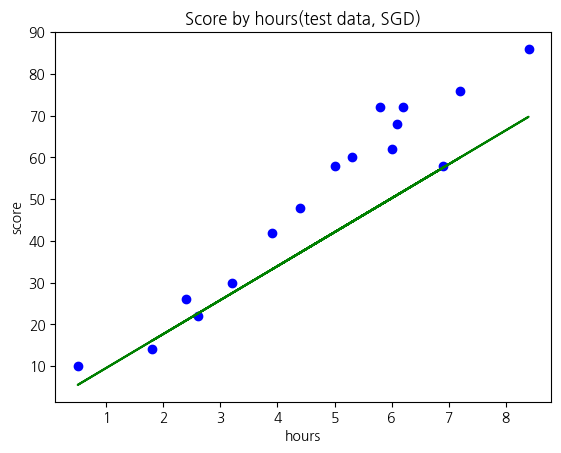

In [47]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, sr.predict(X_train), color="green")
plt.title("Score by hours(test data, SGD)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [48]:
sr.coef_, sr.intercept_

(array([8.13259556]), array([1.433206]))

In [49]:
sr.score(X_test, y_test)

0.884872663907813

In [50]:
sr.score(X_train, y_train)

0.6837363504701681

로지스틱회귀 추가학습 예제

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("../dataset/LogisticRegressionData.csv")
dataset.head()

,hour,pass
0,0.50,0
1,1.20,0
2,1.80,0
3,2.40,0
4,2.60,0


In [52]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [85]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [86]:
classifier.predict([[6]])

array([1])

In [87]:
classifier.predict_proba([[6]])

array([[0.141483, 0.858517]])

In [88]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [89]:
y_test

array([1, 0, 1, 0])

In [90]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [91]:
# 정확도 반환
classifier.score(X_test, y_test)

0.75

In [92]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

/var/folders/t5/w4syjrms3gn00d04kqv8dbyr0000gn/T/ipykernel_26378/3009068081.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [93]:
p = 1/(1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))

In [94]:
X_range.shape

(95,)

In [95]:
p = p.reshape(-1)
p.shape

(95,)

위의 reshape 예시 arr = np.array([[1, 2, 3], [4, 5, 6]])

(2, 3) 형태의 배열을 (6, 1) 형태의 1차원 배열로 변환 arr_reshaped = arr.reshape(-1) print(arr_reshaped) # 출력: [1 2 3 4 5 6]

(2, 3) 형태의 배열을 (3, 2) 형태의 배열로 변환 arr_reshaped = arr.reshape(3, -1) print(arr_reshaped) # 출력: [[1, 2], [3, 4], [5, 6]]

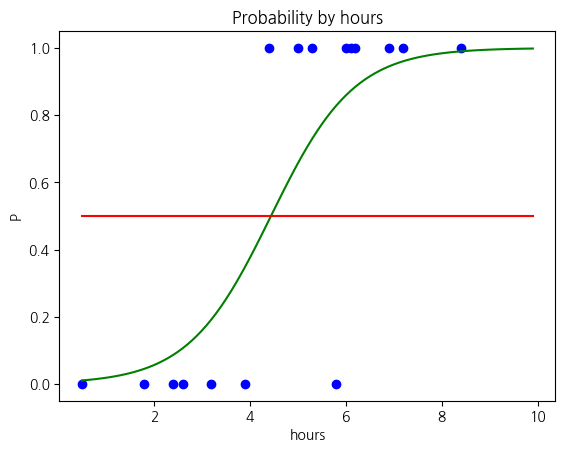

In [96]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_range, p, color="green")
plt.plot(X_range, np.full(len(X_range), 0.5), color="red") # y축에 일정한 값인 0.5를 유지하는 직선
plt.title("Probability by hours")
plt.xlabel("hours")
plt.ylabel("P")
plt.show()

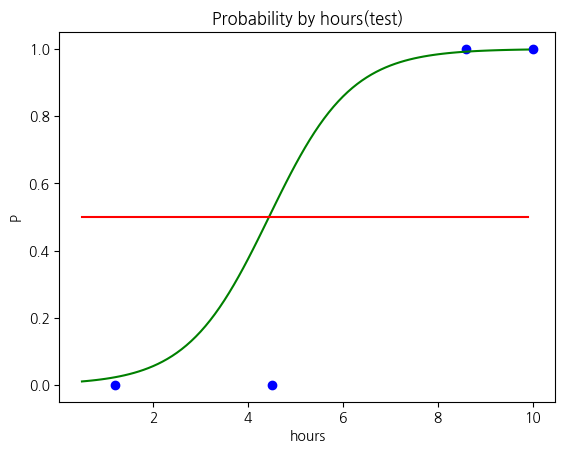

In [97]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_range, p, color="green")
plt.plot(X_range, np.full(len(X_range), 0.5), color="red") # y축에 일정한 값인 0.5를 유지하는 직선
plt.title("Probability by hours(test)")
plt.xlabel("hours")
plt.ylabel("P")
plt.show()